# Exploration Exercises

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

import env
import wrangle

In [2]:
df = wrangle.wrangle_zillow()

In [3]:
df.head()

,bedrooms,bathrooms,sq_ft,home_value,year_built,location
0,4,2.0,3633,296425,2005,LA County
1,3,4.0,1620,847770,2011,LA County
2,3,2.0,2077,646760,1926,LA County
3,0,0.0,1200,5328,1972,LA County
4,0,0.0,171,6920,1973,LA County


In [4]:
df.shape

(2094583, 6)

### 1. As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process

### 2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [5]:
def split_zillow(df):
    train_validate, test = train_test_split(df, test_size=.2,
                                        random_state=123)
    train, validate = train_test_split(train_validate, test_size=.3,
                                   random_state=123)
    return train, validate, test

In [6]:
train, validate, test = split_zillow(df)

In [7]:
train.shape

(1172966, 6)

### 3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [8]:
train.sample(25)

,bedrooms,bathrooms,sq_ft,home_value,year_built,location
1024188,3,3.0,1926,791895,1965,Orange County
392979,3,1.0,1054,509712,1953,LA County
160632,3,3.0,908,30064,1922,LA County
585390,4,2.0,1900,137481,1971,Orange County
1339965,3,2.0,1494,268030,1978,Orange County
419706,4,3.0,2095,318211,1961,LA County
1900740,6,4.0,4325,895785,1999,LA County
886641,4,2.0,1434,54012,1955,LA County
365308,4,3.0,2168,387310,1987,Orange County
319771,4,2.0,1642,240279,1954,LA County


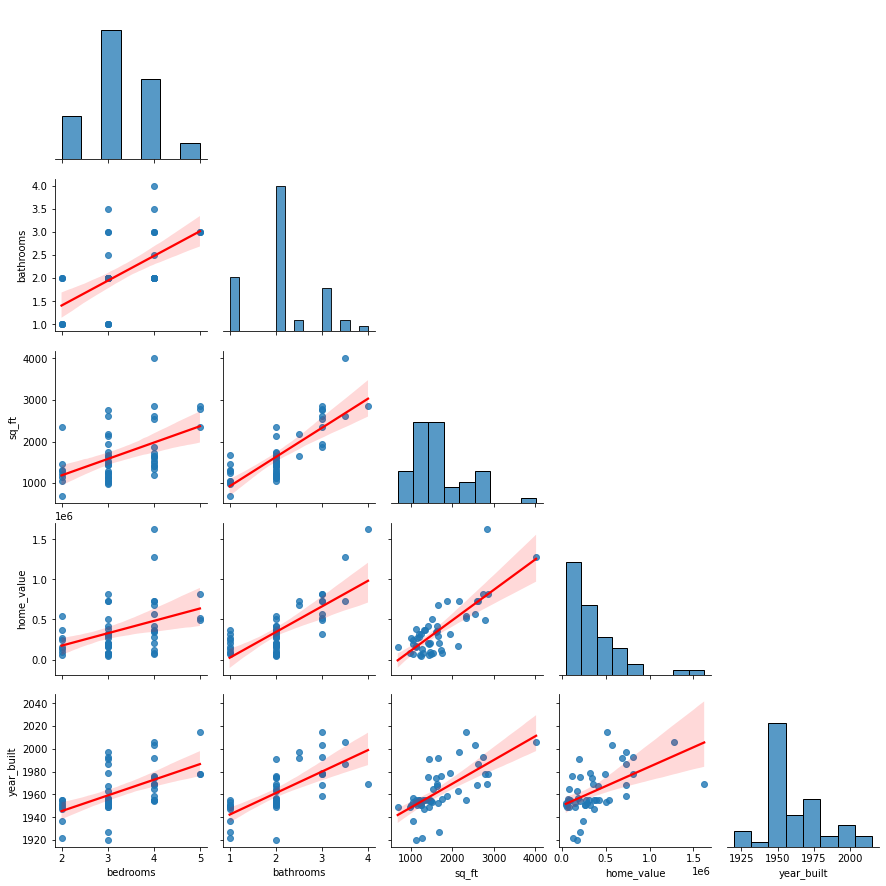

In [9]:
sns.pairplot(train.sample(50), kind='reg', corner=True, plot_kws={'line_kws':{'color':'red'}})

In [10]:
def plot_variable_pairs(df):
    train.sample(50)
    sns.pairplot(train.sample(50), kind='reg', corner=True, plot_kws={'line_kws':{'color':'red'}})

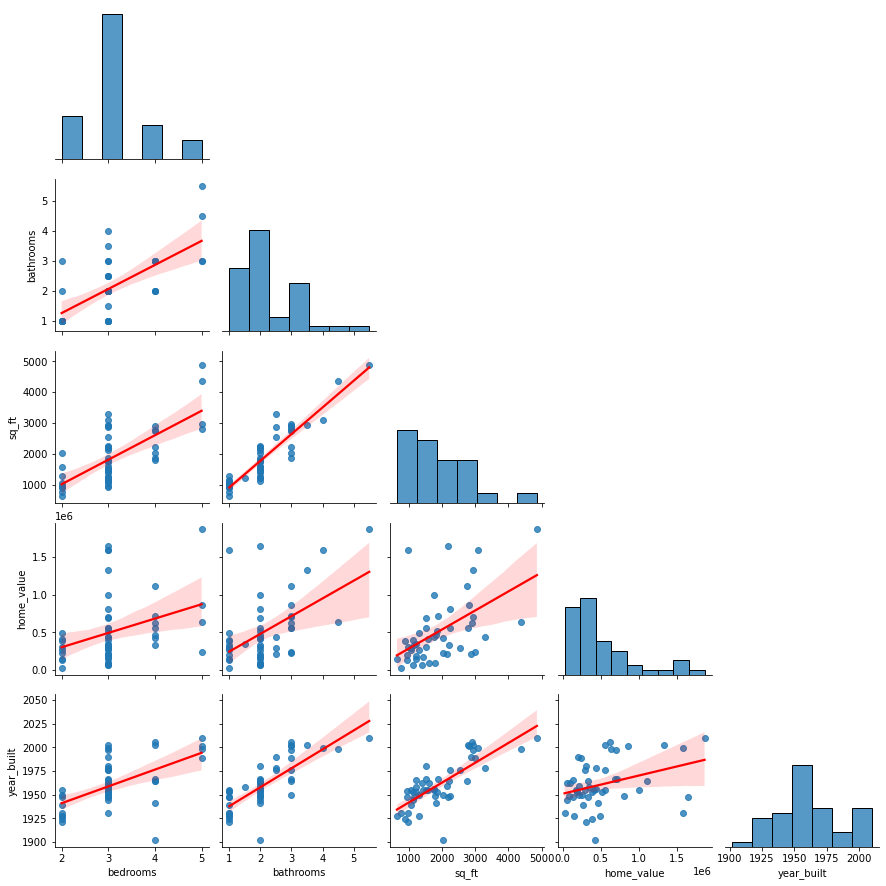

In [11]:
plot_variable_pairs(train)

**Takeaways**


### 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [12]:
def plot_categorical_and_continuous_vars(df, categorical, continuous):
    df_sample = df.sample(1000)
    plt.figure()
    sns.stripplot(x=categorical, y=continuous, data=df_sample)
    plt.figure()
    sns.boxplot(x=categorical, y=continuous, data=df_sample)
    plt.figure()
    sns.barplot(x=categorical, y=continuous, data=df_sample)

In [1]:
plot_categorical_and_continuous_vars(train, 'location', 'home_value')

NameError: name 'plot_categorical_and_continuous_vars' is not defined

In [14]:
cat_cols = ['bedrooms', 'bathrooms', 'year_built', 'location']
cont_cols = ['sq_ft', 'home_value']

In [15]:
def plot_categorical_and_continuous_vars(df, cat_cols, cont_cols):
    for cont in cont_cols:
        for cat in cat_cols:
            fig = plt.figure(figsize= (20, 10))
            fig.suptitle(f'{cont} vs {cat}')
            

            plt.subplot(131)
            sns.stripplot(data=df, x = cat, y = cont)
           

            plt.subplot(1, 3, 3)
            sns.boxplot(data = df, x = cont, hue = cat)
            
            
            plt.subplot(1, 3, 2)
            sns.barplot(data = df, x = cat, y = cont)

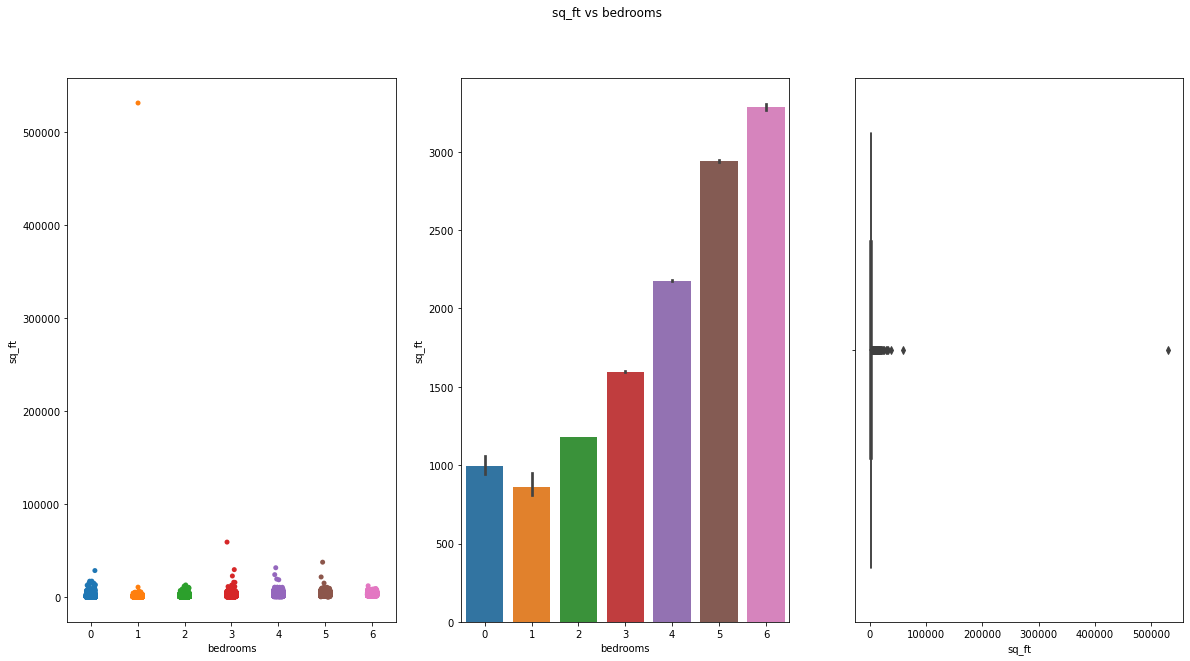

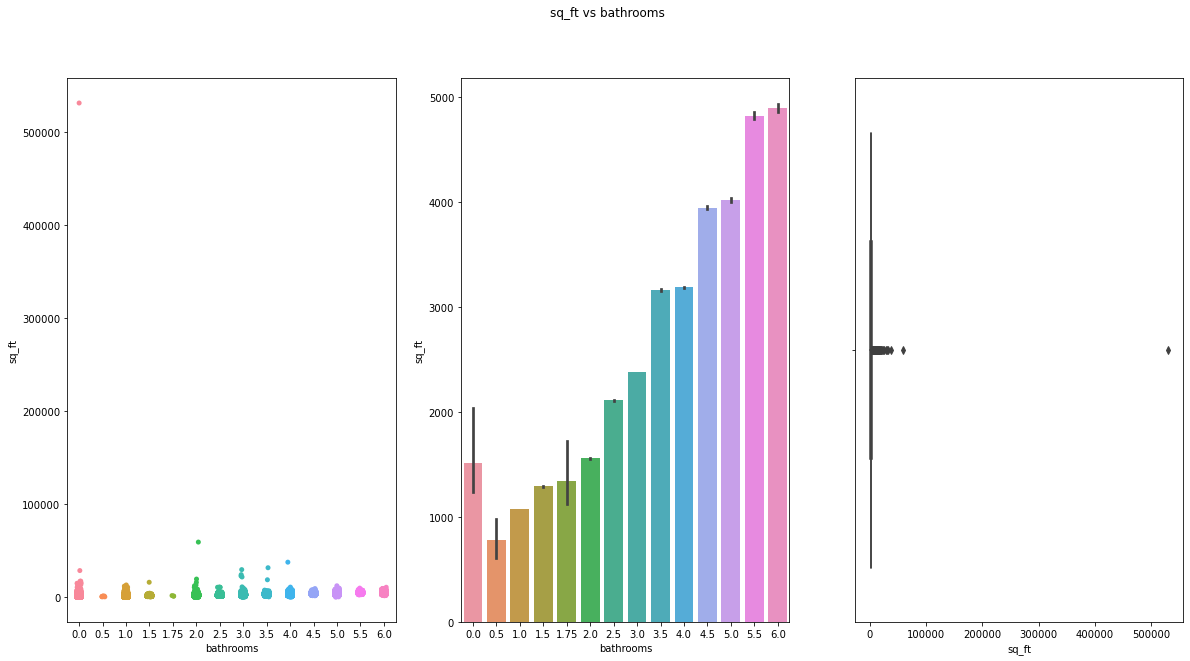

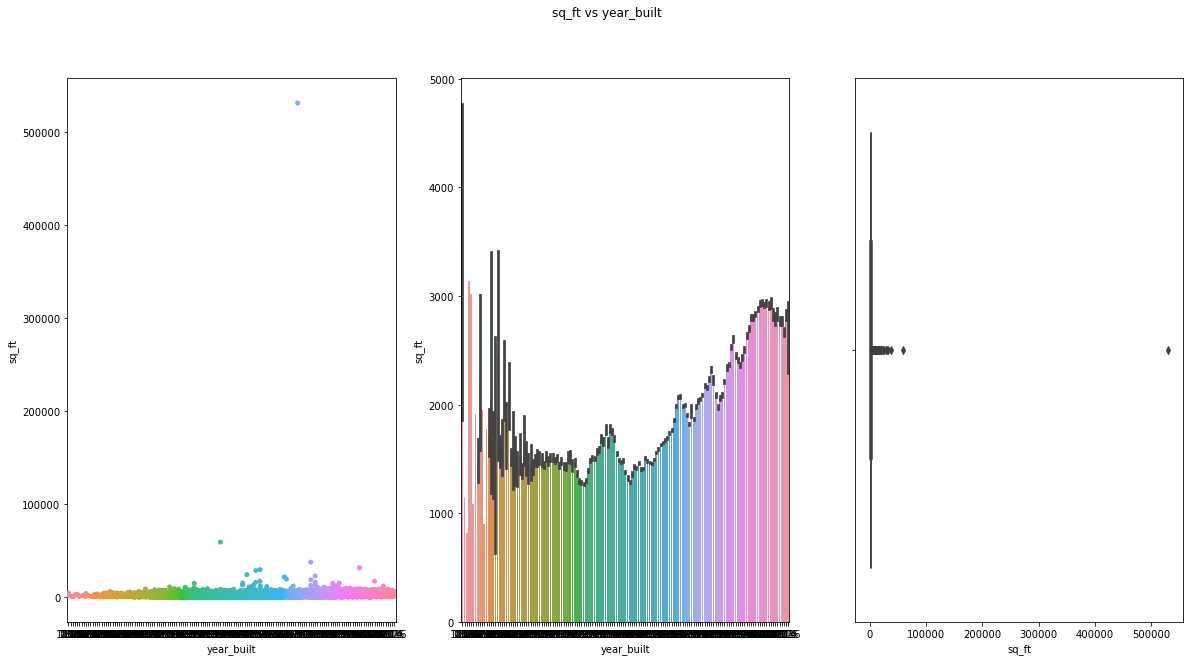

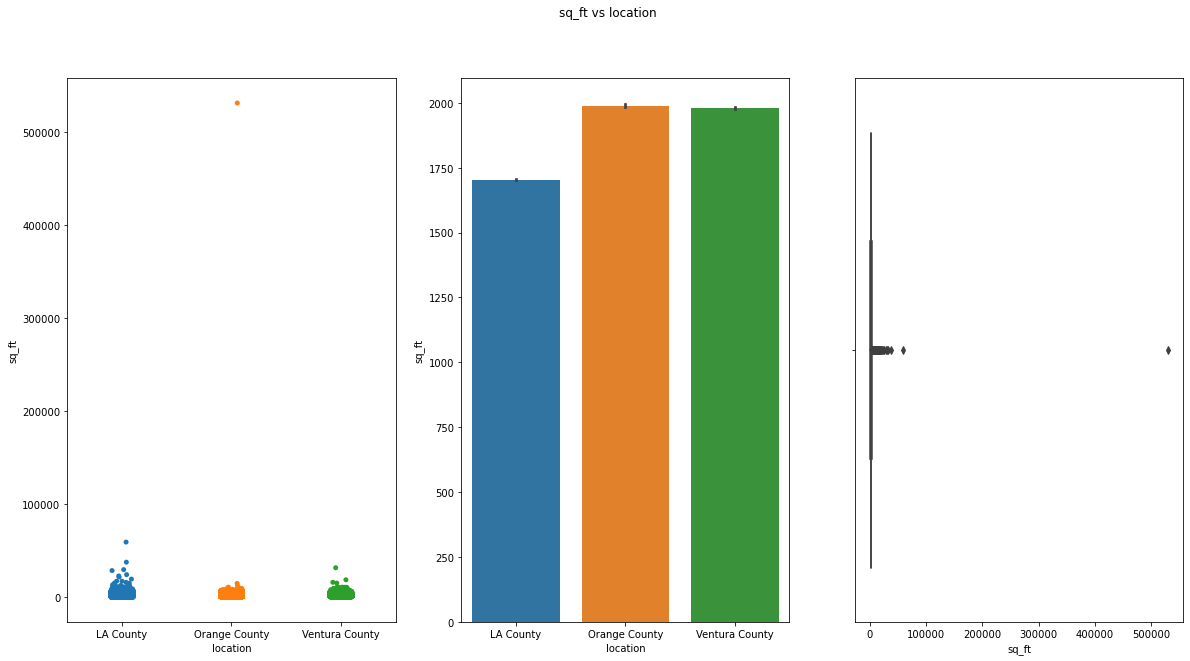

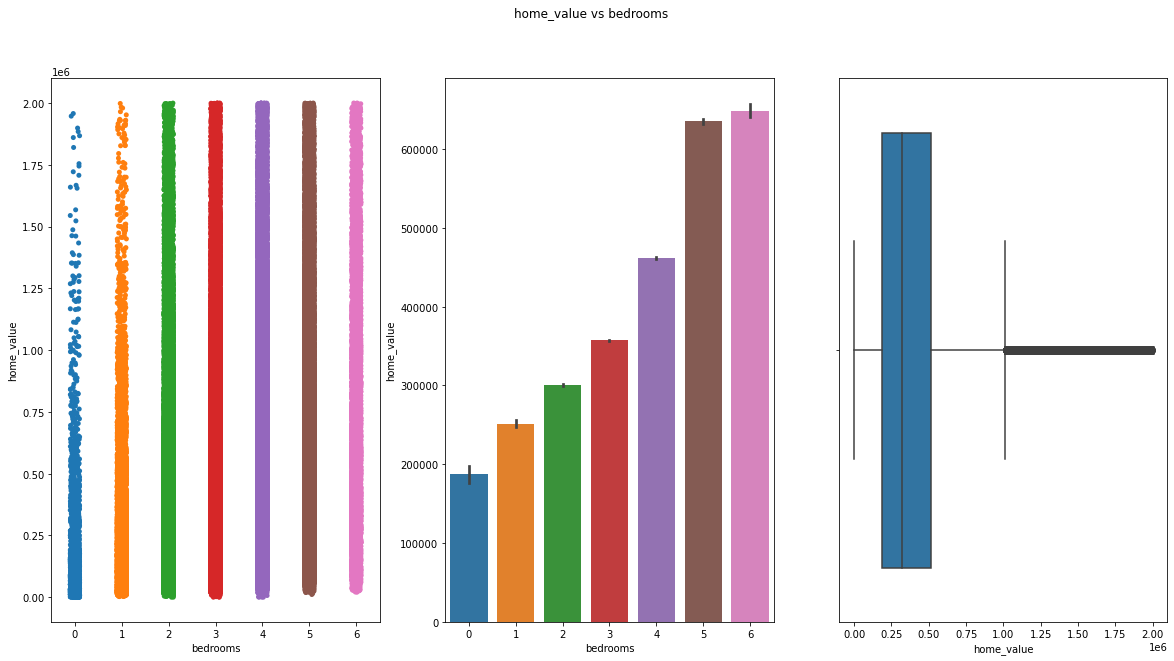

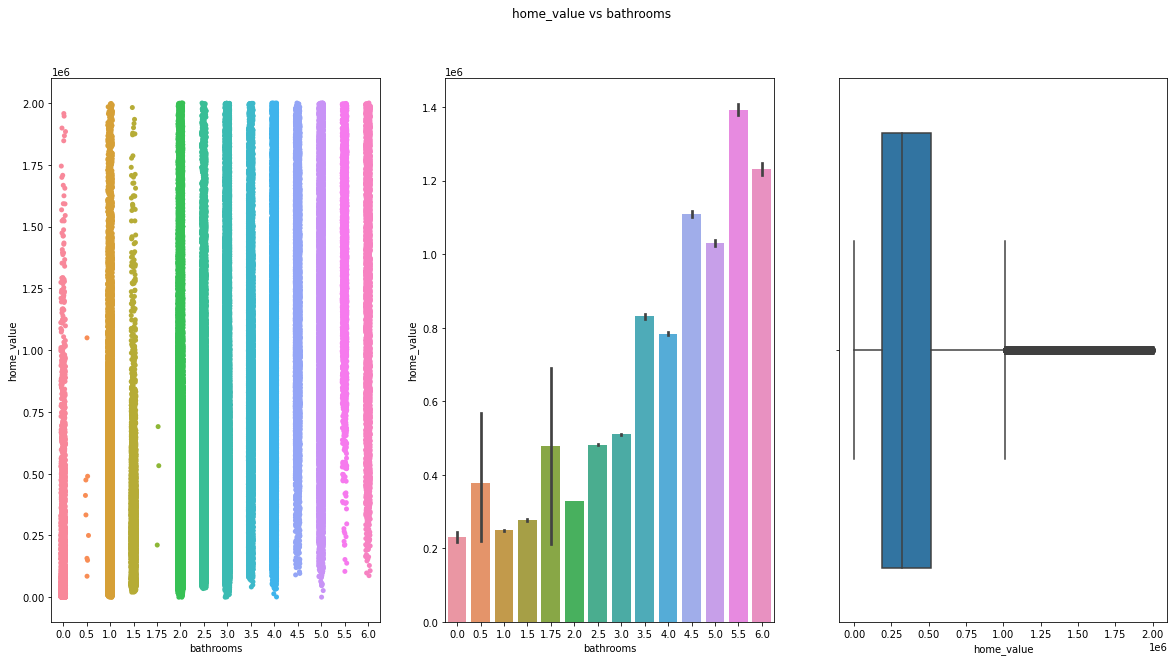

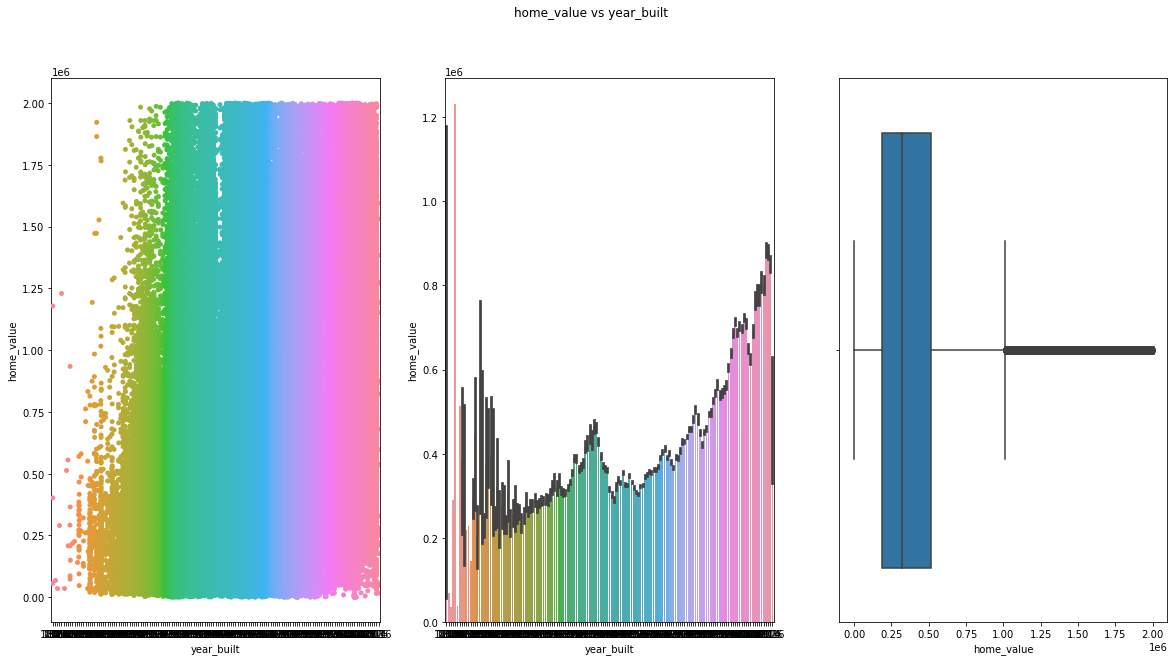

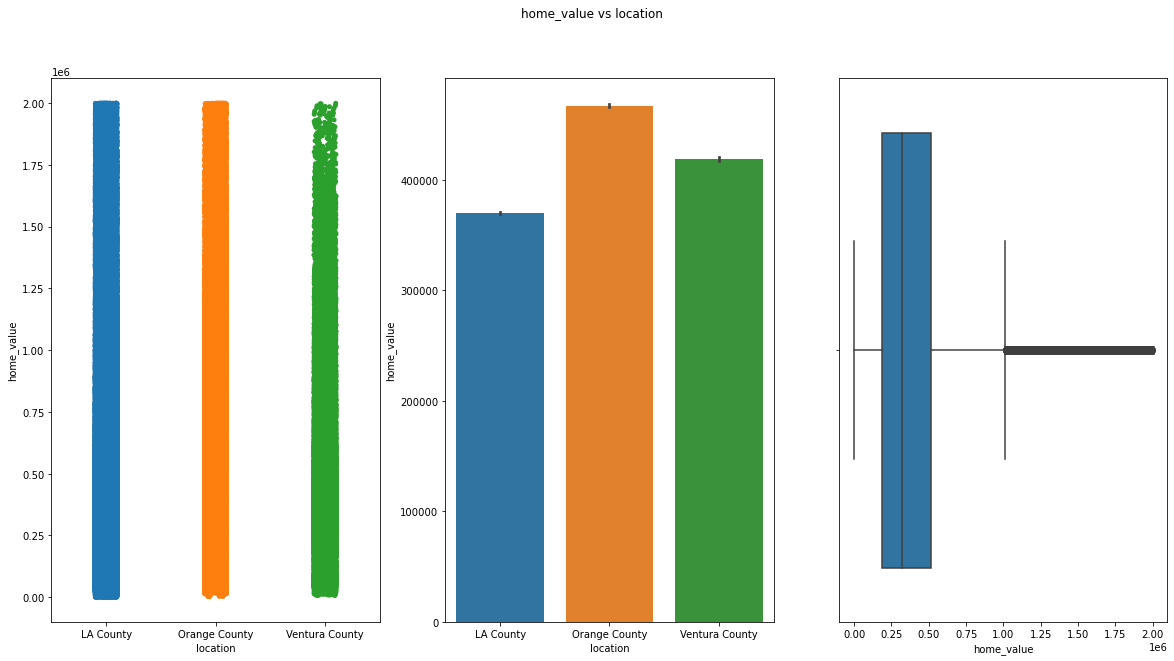

In [16]:
plot_categorical_and_continuous_vars(train, cat_cols, cont_cols)

### 5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

### 6. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

### 7. Come up with some initial hypotheses based on your goal of predicting property value.

##### Initial Hypotheses:

- Bedroom count is correlated with home value
- Bathroom count is correlated with home value
- sq_ft is correlated with home value
- Location is correlated with home value

### 8. Visualize all combinations of variables in some way.

In [17]:
train_corr = train.corr()
train_corr

,bedrooms,bathrooms,sq_ft,home_value,year_built
bedrooms,1.000000,0.628113,0.516222,0.275855,0.385865
bathrooms,0.628113,1.000000,0.688572,0.510617,0.533318
sq_ft,0.516222,0.688572,1.000000,0.496713,0.403924
home_value,0.275855,0.510617,0.496713,1.000000,0.275400
year_built,0.385865,0.533318,0.403924,0.275400,1.000000


<AxesSubplot:>

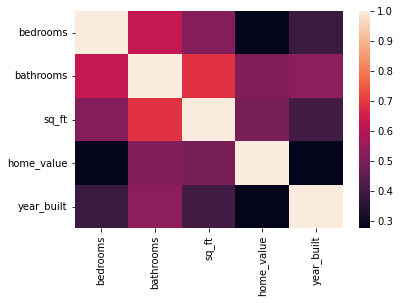

In [18]:
sns.heatmap(train_corr)

### 9. Run the appropriate statistical tests where needed.

In [19]:
from scipy import stats

alpha = 0.05

r_bed, p_bed = stats.pearsonr(x=train['bedrooms'], y=train['home_value'])

r_bath, p_bath = stats.pearsonr(x=train['bathrooms'], y=train['home_value'])

### 10. What independent variables are correlated with the dependent variable, home value?

In [20]:
if p_bed < alpha:
    print('The number of bedrooms is correlated with home value.')
    print('The correlation coefficient is {}.'.format(r_bed))
else:
    print('The number of bedrooms is NOT correlated with home value.')

print()    
    
if p_bath < alpha:
    print('The number of bathrooms is correlated with home value.')
    print('The correlation coefficient is {}.'.format(r_bath))
else:
    print('The number of bathrooms is NOT correlated with home value.')

The number of bedrooms is correlated with home value.
The correlation coefficient is 0.27585479796060597.

The number of bathrooms is correlated with home value.
The correlation coefficient is 0.5106170460870347.


### 11. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

In [21]:
r_ind, p_ind = stats.pearsonr(x=train['sq_ft'], y=train['bathrooms'])

In [22]:
if p_ind < alpha:
    print('The number of bathrooms is correlated with the square footage.')
    print('The correlation coefficient is {}.'.format(r_ind))
else:
    print('The number of bathrooms is NOT correlated with the square footage.')

The number of bathrooms is correlated with the square footage.
The correlation coefficient is 0.6885715559308555.
